# Business Problem
### To predict whether a customer will subscribe to the bank's term deposit or not based on customer details, past campaigning history of the bank and some additional social and economical factors. This is a binary classification task.

# Importing the Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("bank-additional-full.csv", sep=";")


# Basic Checks

In [3]:
pd.set_option('display.max_columns', None) #To dispaly all columns
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.describe(include=["O"]) #For categorical data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- There are 10 numeric variables and 10 categorical variables excluding the target variable. 

# Domain Analysis

## Features  related to customer details 

### Age
- The age of the customer.

### Job 
- Type of job - "admin", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown"

### Marital 
- The marital status of the customer -"divorced"(means divorced or widowed), "married", "single", "unknown"

### Education
- The education qualification of the customer-"basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown"
- "basic.4y", "basic.6y", "basic.9y" simply means studiied till the 4th, 6th and 9th grade respectively.

### Default
- has credit in default? -  "no", "yes", "unknown"
- whether the customer has failed to make payments of credit card i.e defaulted on credit card payments. Those that have defaulted or failed to make payments have lower credit scores and face serious financial repurcussions. Calling such individuals for the marketing campaign would not be advisable. 

### Housing
- whether the customer has a housing loan?-"no","yes","unknown"
### Loan
- whether the customer has a personal loan? -"no","yes","unknown"

## Features related to the last contact of the current campaign:

### Contact
- contact communication type i.e what type of device was used by the customer -"cellular","telephone"

### Month
- last contact month of year - "jan", "feb", "mar", ..., "nov", "dec"

### Day_of_week
- last contact day of the week - "mon","tue","wed","thu","fri"

### Duration
- last contact duration, in seconds (numeric). 

## Other attributes

### Campaign
- number of contacts performed during this campaign and for this client (numeric, includes last contact)
- sometimes a client maybe contacted repeatedly or more than once during the campaign

### pdays
- number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

### previous
- number of contacts performed before this campaign and for this client 

### poutcome
- outcome of the previous marketing campaign - "failure","nonexistent","success"

## Social and Economic context attributes

### emp.var.rate
- employment variation rate - quarterly indicator (numeric)
- It is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. When the economy is in a recession or depression the emp variation ratesare higher and the economy is unstable so people are more conservative with their money and how the spend it because their financial future is less clear due to  unemployment. When the economy is at its peak, i.e, lower variations, the economy is stable and individuals are more open to  investments because their employment options are greater.

### cons.price.idx
- consumer price index - monthly indicator (numeric)     
- It measures the overall change in consumer prices over time based on a representative basket of goods and services. The CPI is the most widely used as a measure of inflation. 

###  cons.conf.idx
- consumer confidence index - monthly indicator (numeric)     
- It is a survey that indicates how optimistic or pessimistic consumers are regarding their expected financial situation. If the consumers are optimistic, spending will be more, whereas if they are not so confident, then their poor consumption pattern may lead to recession

### euribor3m
- euribor 3 month rate - daily indicator (numeric)
- Euribor or Euro InterBank Offer Rate  is based on the average interest rates at which a large panel of European banks borrow funds from one another. 
- Three-Month EURIBOR is the value of the interest rate for deposits in euro for a period of three months.
- higher the interest rate the more willingly a customer will spend their money on financial tools

###  nr.employed
- number of employees in the bank - quarterly indicator (numeric)
- The more employees the bank has, the more influential and prestigious this bank is and thus the chances of subscribing to a term deposist for such a bank are higher. 

In [7]:
# Renaming certain columns for convinience
data.rename( columns= {"emp.var.rate":"emp_var_rate","cons.conf.idx":"cons_conf_idx","nr.employed":"nr_employed" ,"cons.price.idx":"cons_price_idx"}, inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

## Univariate Analysis

In [8]:
import sweetviz as sv
sv_report = sv.analyze(data)
sv_report.show_html()
#Univarate analysis report is generated and present in the folder. 

### Age
The max age value is 98 and min age 17. The average age is 40. 

### Job 
The top two job types are admin(25%) and blue-collar(22%). There are some unknown values(<1%) which will need to be handled.

### Marital
Most people are married(61%) as compared to single(28%) and divorced(11%). This feature has some unknown values(<1%).

### Education
Most participants have a university degree(30%) or have completed high school(23%). Fewer people have lower basic education qualifications. This column contains unknown values.

### Default
Most people have not defaulted on loans or credit card payments- 79%. However this value is unknown for 21% of people. Less than 1% of participants have defaulted.

### Housing
The percentage of people having a housing loan is similar to those who don't. This column contains unknown values.

### Loan
Most participants dont have a loan (80%). This column contains unknown values.

### Contact
Most people used their cellphone(63%) to recieve the campaign calls as compared to telephone(37%). 

### Month
Most of the last contact with the customer has been in the month of May(33%) and the least in December. There is no information for the months of January and February. 

### Day of the week
There is no significant difference in the percentage of observations classified by last contacted day of the week. 

### Campaign
For the current campaign, most customers were contacted only once (42.8%) or twice(25.7%). A very small percentage of people were contacted more than 8 times. 

### pdays
Most of the clients (96.3%) who were called during the current campaign had not been contacted previously for any past campaigns. The remaining percentage of clients were contacted within 15 days from the previous campign.

### previous
86% of people have not been contacted before for any previous campaigns while the remaining have been contacted before atleast once.

### poutcome
For 80% of the clients the outcome of the previous campaigns - whether they subscribed or not- was not known. 10% was a failure and only 3% was successful.

### emp var rate
This value ranges from 1.4 to -3.0 with 39% of obs having 1.4.

### cons price idx
The value ranges from 92 to 94 with most values having the the value 93.9. Lower values indicate cheaper prices of goods.

### cons conf idx
The value ranges from -50 to -30 indicating that the general view of the people was pesssimistic about their financial situation thus people were less likely to invest.

### euribor3m
The overall interest rates were mostly 4.8 %

### nr_employed
On average 5,167 worked in the bank with a max number of 5,228. For most of the obs (39.4%) the number of employees working were 5,228.

### y
89% of people did not subscribe to the term deposit whilee 11 % subscribed. The target variable is clearly imbalanced. 







### Columns with unkown values
1. job
2. marital
3. education
4. default
5. housing
6. loan

## Bivariate Analysis


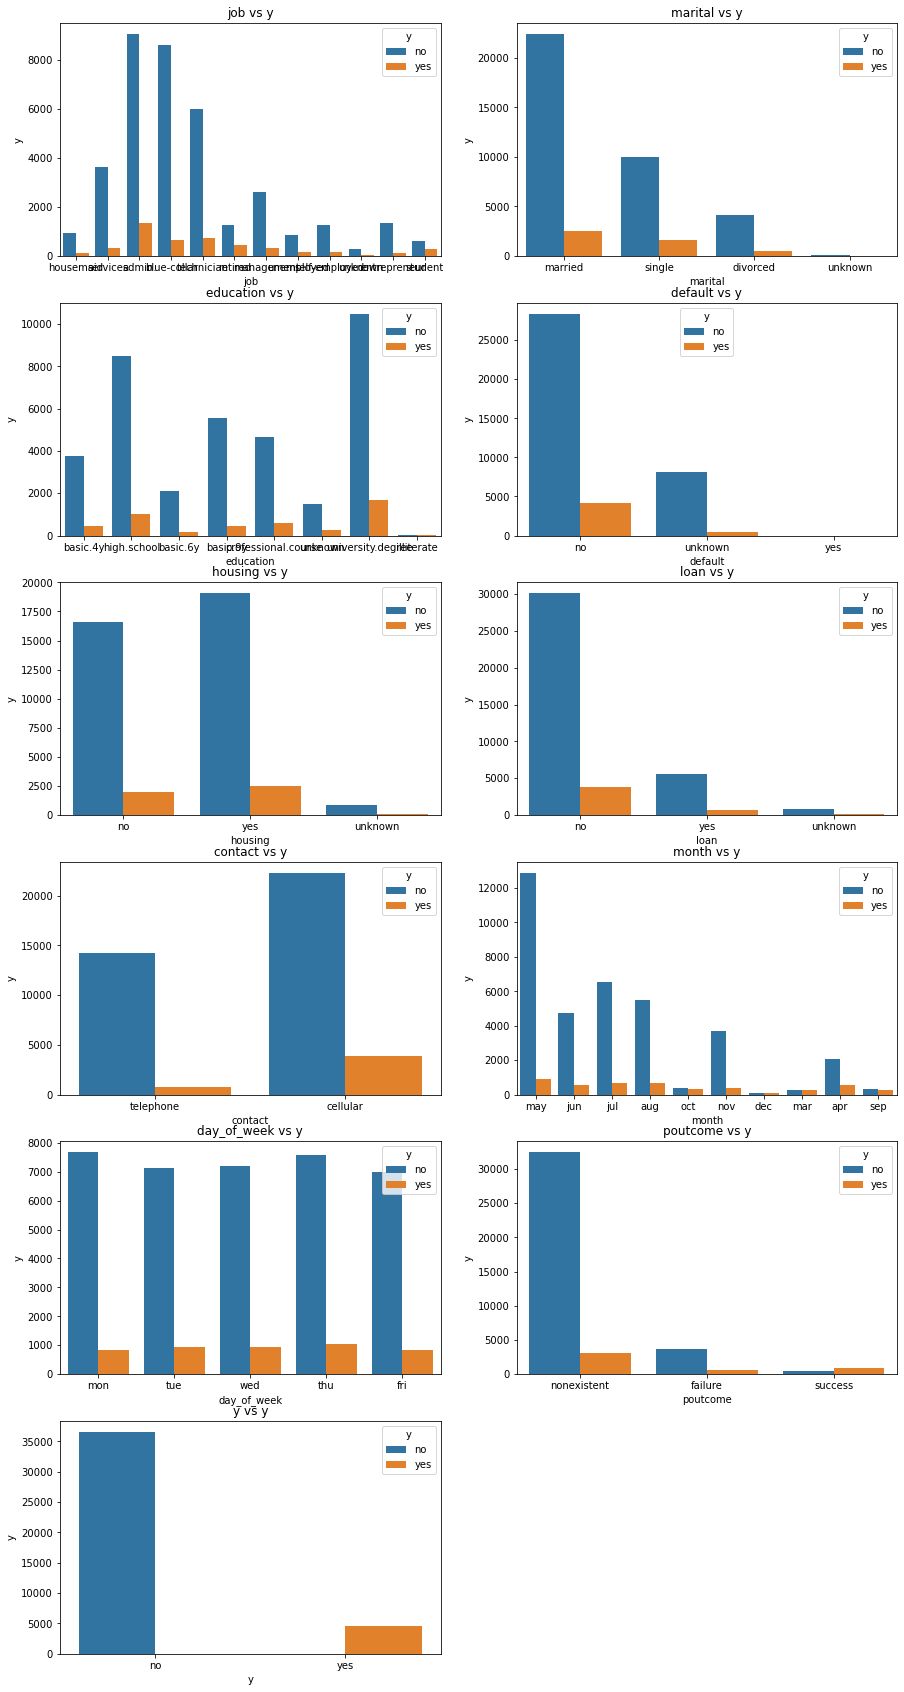

In [9]:
# Categorical data
plt.figure(figsize=(15,30))
plotnumber=0
for column in data.columns:
    if data[column].dtype=="object":
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.countplot(data=data,x=data[column], hue=data.y)
        plt.title(f"{column} vs y")
        plt.xlabel(f"{column}")
        plt.ylabel("y")


### Job vs y
- Students and retired people have a proportionally higher subscription rate to the term deposit 
- blue-collar professionals have the lowest number of successes i.e they are least likely to subscribe to a term deposit 
- People in services and those who are entrepreneurs also have lower term deposit subscription rates.

### Marital vs y
- Single and divorced people are more likely to subscribe to the term deposit as compared to married individuals.

### Education vs y
- people who have done a university degree or a professional course are more likely to subscribe to a term deposit.

### Default vs y 
- People who have not defaulted on payments are more likely to take a term deposit.

### Housing vs y
- There is no significant difference in the term deposit subscription chances and having a housing loan or not. Thus, having a housing loan or not doesnt have much impact on our target variable.

### Loan vs y
- Having a loan or not doesn't significantly impact chances of subscribing to a term deposit.

### Conatct vs y
- Those people who responded using a cellular have higher term deposit subscription rates. 

### Month vs y
- People contacted in the months of october, december, march and september have proportionally higher term deposit subscription rates.
- The month of may has the lowest term deposit subscription rates.

### Day of the week vs y
- There is no significant difference in the term deposit subscription chances and weekday.

### poutcome vs y
- People who were contacted in previous campaigns and had a successful outcome in that are more likely to subscribe to a term deposit i.e, have a success in current marketing campaign as well.

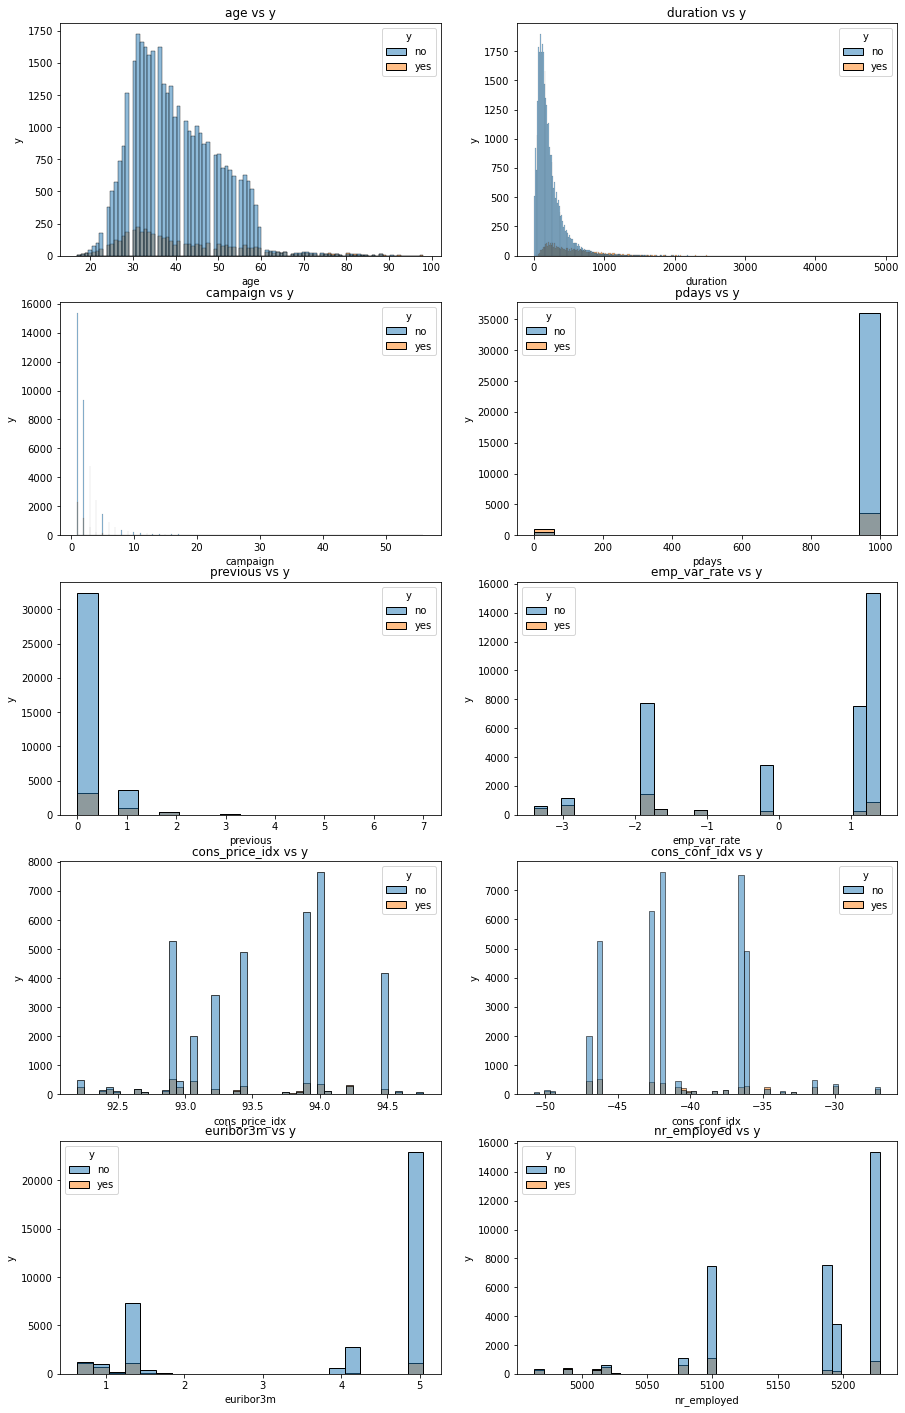

In [10]:
# Numerical data
plt.figure(figsize=(15,30))
plotnumber=0
for column in data.columns:
    if data[column].dtype!="object":
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.histplot(data=data,x=data[column], hue=data.y)
        plt.title(f"{column} vs y")
        plt.xlabel(f"{column}")
        plt.ylabel("y")


### Age vs y
- Older people (>60 years) abd young people (<25 years) are  more likely to subscribe to a term deposit 

### Duration vs y
- The longer the call duration the more likely the person is to subscribe to a term deposit

### Campaign vs y
- Clients who were contacted less than 4 times have the highest success rates
- The subscribtion rates to the term deposit decresed as the number of times the the client was contacted in a campign increased

### pdays vs y
- People who were contacted within 30 days from a previous campaign had higher success rates than those who were never contacted before. However, this subset of people forms a very small subset of the total observations since more than 90% of the people had never been contacted before.

### previous vs y
- The success rates ("yes") increased as the number of times a Client was contacted for previous marketing campaigns increased. 

### emp_var_rate vs y
- The lower the emp_var_rate the greater the success rates of the campaign.

### cons_price_idx vs y
- Success rates seem to be higher when consumer price index is 92 or greater than 94.5

### cons_conf_idx vs y
- In general, when the consumer confidence index is very low ( around -50) or high (around -30) the success rates are higher.

### euribor3m vs y
- The chances of a client subscribing to a term deposit seem to be proportionally higher when the euribor rates were low i.e <1.5%

### nr_employed vs y
- Success rates seem to higher when the number of employees in the bank were lower

# Data Preprocessing

## Missing Values

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Despite the following information indicating that there are no missing values, while doing data analysis there were many features that had "unknown" as one of the labels. This needs to handled- either imputed or removed.

In [12]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan'] #list of features with unkown values

for column in columns:
    total = len(data.loc[data[column]=="unknown"])
    print(f"The feature {column} has {total} unknown labels.")

The feature job has 330 unknown labels.
The feature marital has 80 unknown labels.
The feature education has 1731 unknown labels.
The feature default has 8597 unknown labels.
The feature housing has 990 unknown labels.
The feature loan has 990 unknown labels.


We can see that the following features have a significant amount of unknown values. The following data will be handled by imputing with the mode i.e, most frequently occuring category of the feature. 

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values="unknown", strategy = 'most_frequent')
#Imputing only those columns with unknown label 
data.loc[:, ['job', 'marital', 'education', 'default', 'housing', 'loan']]= imputer.fit_transform(data.loc[:, ['job', 'marital', 'education', 'default', 'housing', 'loan']])



# Outliers

### Visualising the outliers using boxplots

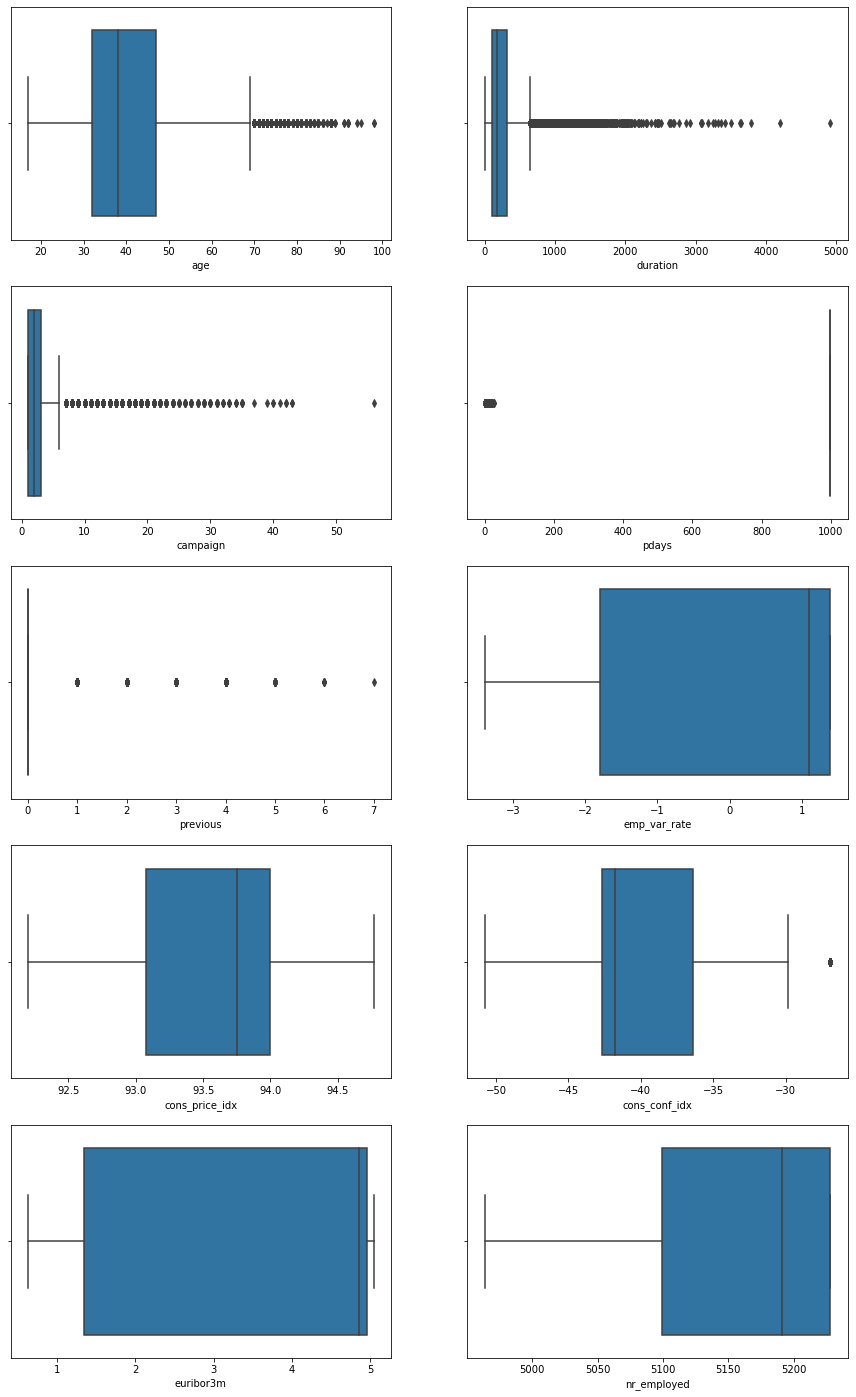

In [14]:
plt.figure(figsize=(15,30))
plotnumber=0
for column in data.columns:
    if data[column].dtype!="object":
        plotnumber+=1
        ax= plt.subplot(6,2,plotnumber)
        sns.boxplot(data=data,x=data[column])
      

In [15]:
#Checking for which outliers need to be handled. Outliers that make up more than 5% of total obs need not be handled. 
for column in data.columns:
    if data[column].dtype!="object":
        lower_quartile = data[column].quantile(0.25)
        upper_quartile= data[column].quantile(0.75)
        IQR= upper_quartile - lower_quartile
        outliers = data.loc[(data[column]>= (upper_quartile+IQR*1.5))|(data[column]<=(lower_quartile-IQR*1.5))]
        # Checking for the percentage of outliers
        if len(outliers)>=(0.05*len(data)):
            print(f"Since outliers for {column} column are more than 5% we dont make any changes")
        elif len(outliers)==0: 
            print(f"The column {column} has no outliers.")
            
        else:
             print(f"Outliers need to be handled for {column} column. There are {len(outliers)} outliers.")


Outliers need to be handled for age column. There are 469 outliers.
Since outliers for duration column are more than 5% we dont make any changes
Since outliers for campaign column are more than 5% we dont make any changes
Since outliers for pdays column are more than 5% we dont make any changes
Since outliers for previous column are more than 5% we dont make any changes
The column emp_var_rate has no outliers.
The column cons_price_idx has no outliers.
Outliers need to be handled for cons_conf_idx column. There are 447 outliers.
The column euribor3m has no outliers.
The column nr_employed has no outliers.


From the above code we have identified that the "age" feature needs to handled for outliers.
Since the consumer confidence index is a general economic metric that is specific to that time period and is an extra feature added to improve the predictions of our dataset we will not handle those outliers. 

In [16]:
lower_quartile = data.age.quantile(0.25)
upper_quartile= data.age.quantile(0.75)
IQR= upper_quartile - lower_quartile
outliers = data.loc[(data.age>= (upper_quartile+IQR*1.5))|(data.age<=(lower_quartile-IQR*1.5))]
print(f"Number of outliers is {len(outliers)}.")
outliers.y.value_counts()


Number of outliers is 469.


no     248
yes    221
Name: y, dtype: int64

From bivariate analysis we have identified that older people have higher chances of subscribing to the term deposit. From the above code we can clearly see that our age outliers have about half the observations with "yes" indicating that age plays an important role in prediction of our target variable, especially the older age groups. Thus we will first create our model without handling outliers, check the performance and then handle outliers if needed. 

# Handling Categorical Variables

There are 10 categorical variables that need to handled. We will use one hot encoding to convert our categorical variables to a numeric form.

In [17]:
data.y = data.y.map({"yes":1, "no":0})

In [18]:
data = pd.get_dummies(data, drop_first=True)

In [19]:
data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


# Model Creation

## Splitting the Dataset

In [20]:
from sklearn.model_selection import train_test_split

X= data.drop("y", axis=1)
y = data.y

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

## Balancing the data

In [21]:
# Checking if our target variable is balanced.
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

Our target variable is clearly imbalanced with 88.73% being '0 or no' and 11.27% being '1 or yes'. Using the SMOTE technique on the training data to generate synthetic samples.

In [22]:
data.iloc[:, 11:] = data.iloc[:, 11:].astype('float64')
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [23]:
from collections import Counter
counter =Counter()
print(f"Balanced target variable: {Counter(y_train)}")

Balanced target variable: Counter({0: 27404, 1: 27404})


## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,:10]= sc.fit_transform(X_train.iloc[:,:10])
X_test.iloc[:,:10]= sc.fit_transform(X_test.iloc[:,:10])

## Model

In [25]:
from sklearn.linear_model import LogisticRegression
model_1 =LogisticRegression(max_iter=200)
model_1.fit(X_train,y_train)

y_pred = model_1.predict(X_test)

## Model Evaluation

In [26]:
predictions = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
predictions

,y_test,y_pred
32884,0,0
3169,0,0
32206,0,0
9403,0,0
14020,0,0
...,...,...
35087,0,0
12883,0,0
3588,0,0
31192,0,0


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[7771, 1373],
       [ 184,  969]], dtype=int64)

In [28]:
from sklearn.metrics import recall_score, precision_score, f1_score
print(f"The model's Recall score is {round(recall_score(y_test, y_pred),2)}.\nhe model's Precision score is {round(precision_score(y_test, y_pred),2)}\nThe model's f1 score is {round(f1_score(y_test, y_pred),2)}")

The model's Recall score is 0.84.
he model's Precision score is 0.41
The model's f1 score is 0.55


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9144
           1       0.41      0.84      0.55      1153

    accuracy                           0.85     10297
   macro avg       0.70      0.85      0.73     10297
weighted avg       0.91      0.85      0.87     10297



For our use case, it is important that our recall is high. The False Negatives i.e customer subscribing to term deposit but model predicting customer will not must be as low as possible. We could be linient on the False Positives i.e customer not subscribing to term deposit but model predicting customer will thus compromising on lower Precison score for higher Recall.  This is because it would be more costly to lose out on a customer that could actually subscribe if the bank called than call a customer that would most likely end up  not subscribing.  

Text(0.5, 1.0, 'Receiver Operating Characteristic - Logistic Regression')

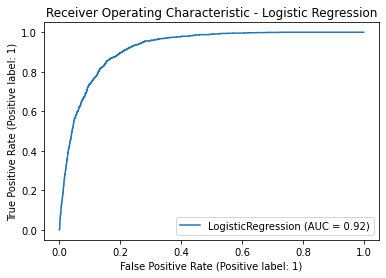

In [30]:
roc = RocCurveDisplay.from_estimator(model_1, X_test, y_test)
plt.title('Receiver Operating Characteristic - Logistic Regression')

In [31]:
y_pred_prob = model_1.predict_proba(X_test)[:,1] #Taking predicted probability values for only the positive class 
print('The roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred_prob))

The roc_auc_score for Logistic Regression:  0.9200998346585689


##### The following code shows the  confusion matrices for different thresholds. We can see that there is a trade-off between false positives and false negitives as the threshold increases. Depending on the client, a threshold could be selected. Lower thresholds implies lesser false negatives but greater false positives and vice-versa. For our use case, we will select 0.5 as our threshold.

In [32]:
def predict_threshold(model,X_test,threshold):
    return np.where(model.predict_proba(X_test)[:,1]>threshold,1,0) #if our predicted prob is greater than threshold we assign 1 else 0

for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model_1,X_test,thr)
    print("Threshold :",thr)#printing threshold
    print(confusion_matrix(y_test,y_predict))# confusion matrix for each prediction

Threshold : 0.0
[[   0 9144]
 [   0 1153]]
Threshold : 0.1
[[5553 3591]
 [  27 1126]]
Threshold : 0.2
[[6579 2565]
 [  54 1099]]
Threshold : 0.30000000000000004
[[7125 2019]
 [ 102 1051]]
Threshold : 0.4
[[7471 1673]
 [ 144 1009]]
Threshold : 0.5
[[7771 1373]
 [ 184  969]]
Threshold : 0.6000000000000001
[[8029 1115]
 [ 256  897]]
Threshold : 0.7000000000000001
[[8269  875]
 [ 313  840]]
Threshold : 0.8
[[8476  668]
 [ 407  746]]
Threshold : 0.9
[[8724  420]
 [ 535  618]]


In [34]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
scores = cross_val_score(pipeline, X, y, scoring="recall", cv=cv, n_jobs=-1)
print("Model"," mean cross val score=", scores.mean() , "std=", scores.std())

Model  mean cross val score= 0.7677442528735631 std= 0.060661329610335796


## Conclusion

The performance of the Logistic Regression model is the best while considering recall as the primary evaluation metric. 

The model's performance metrics are as follows-
- Recall score: 0.84.
- Precision score: 0.41
- f1 score: 0.55
- roc_auc_score: 0.92
- mean cross val score= 0.76 with std= 0.06
